# Project:  No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> __This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.__

>__'ScheduledDay’ tells us on what day the patient set up their appointment.__

>__‘Neighborhood’ indicates the location of the hospital.__

>__‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program__
             

### Most Qustions i'm interested to ask and answer them are:
1. Which gender is more committed to show up ?
2. Which days of the week are most suitable for people to show up ? and does it depend on if these days are working days or not ?
3. Are No-show appointments associated with a certain Age ?
4. Do patients with a  scolarship show up more than  patients without one ?
5. Which Neighbourhood has the biggest number of appointments ?
6. Do patients with Hypertension show up more ?
7. Do patients with Diabetes show up more ?
8. Does alcoholism effect patients showing up who have it ?
9. Does Handicap prevent patients from attend their appointments ?
10. Does sending SMS to patients to remind them of their appointments decrease the number of absence ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Dependant Variable : 
- No-show
### Independant Variables : 
- ScheduledDay
- Neighbourhood 	
- Scholarship

### Data Assessing

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Aspects
- 'ScheduledDay' , 'AppointmentDay' columns are str instead of Datetime.
- Unwanted columns : 'PatientId', 'AppointmentID'
- 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received','Handcap' features should be boolean data types as there most values are zero
- Some columns names are confusing, ex: 'Hipertension' instead of 'Hypertension', etc..
- 'Age' column has min (-1) and max (115) which is not sensible.

### Data Cleaning 

#### First let's make a copy of each piece of data before any cleaning occurs

In [10]:
cleaned_df = df.copy()

#### Define
- Convert 'ScheduledDay', 'AppointmentDay' columns to datetime

#### Code

In [11]:
cleaned_df['ScheduledDay'] = pd.to_datetime(cleaned_df['ScheduledDay'])
cleaned_df['AppointmentDay'] = pd.to_datetime(cleaned_df['AppointmentDay'])

#### Test

In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


#### Define
- Drop unwanted columns

#### Code

In [13]:
cleaned_df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

#### Test

In [14]:
cleaned_df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

#### Define 
- Convert 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'Handcap' columns to bool

#### Code

In [15]:
col = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'Handcap']
for c in col:
    cleaned_df[c] = cleaned_df[c].astype(bool)

#### Test

In [16]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null bool
Hipertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handcap           110527 non-null bool
SMS_received      110527 non-null bool
No-show           110527 non-null object
dtypes: bool(6), datetime64[ns](2), int64(1), object(3)
memory usage: 5.7+ MB


#### Define
- Rename some columns to be correct and more readable

#### Code

In [17]:
cleaned_df.rename(columns={"ScheduledDay": "Scheduled_day", "AppointmentDay": "Appointment_day"}, inplace=True)
cleaned_df.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap"}, inplace=True)
cleaned_df.rename(columns={"No-show": "No_show"}, inplace=True)

#### Test

In [18]:
cleaned_df.head()

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No


#### Define 
- Drop rows that have unreasonable value of age

#### Code

In [19]:
cleaned_df.loc[cleaned_df['Age']== -1]

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,False,False,No


In [20]:
cleaned_df = cleaned_df.drop(index=99832, axis=0)

In [21]:
cleaned_df.loc[cleaned_df['Age']== 115]

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
63912,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,False,False,False,False,True,False,Yes
63915,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,False,False,False,False,True,False,Yes
68127,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,False,False,False,False,True,False,Yes
76284,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,False,False,False,False,True,False,No
97666,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,False,True,False,False,False,True,No


In [22]:
cleaned_df = cleaned_df.drop(index=[63912, 63915, 68127, 76284, 97666], axis=0)

#### Test

In [23]:
cleaned_df['Age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Which gender is more committed to show up?

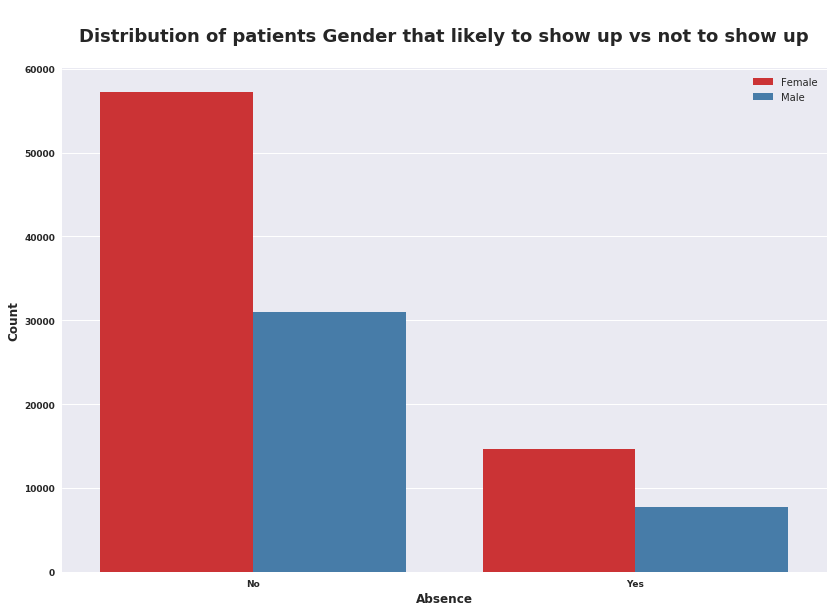

In [24]:
sns.set(rc={'figure.figsize':(13.7,9.27)})
sns.countplot(data=cleaned_df, x = 'No_show', hue = 'Gender', palette="Set1");
plt.title('\nDistribution of patients Gender that likely to show up vs not to show up\n', fontsize=18, fontweight='bold')
plt.xlabel('Absence' , fontweight='bold' , fontsize=12 );
plt.ylabel('Count' , fontweight='bold' , fontsize=12 );
plt.xticks(fontsize=9 ,fontweight='bold');
plt.yticks(fontsize=9 ,fontweight='bold');
plt.legend(['Female', 'Male']);

#### According to the graph, males and females are likely to show up but females are a bit more to be committed because of the number of females which is higher than males. 

### Question 2 : Are there days when the show-up is more than absence ? and does it depend on if these days are working days or not ?

In [25]:
# will make a new column first and add to it the days name 
# by converting the 'Scheduled_day' to day_name()

cleaned_df['Day_of_week'] = cleaned_df['Scheduled_day'].dt.day_name()
cleaned_df['Day_of_week'].values

array(['Friday', 'Friday', 'Friday', ..., 'Wednesday', 'Wednesday',
       'Wednesday'], dtype=object)

In [26]:
show = cleaned_df[cleaned_df['No_show'] == 'No']
absent = cleaned_df[cleaned_df['No_show'] == 'Yes']

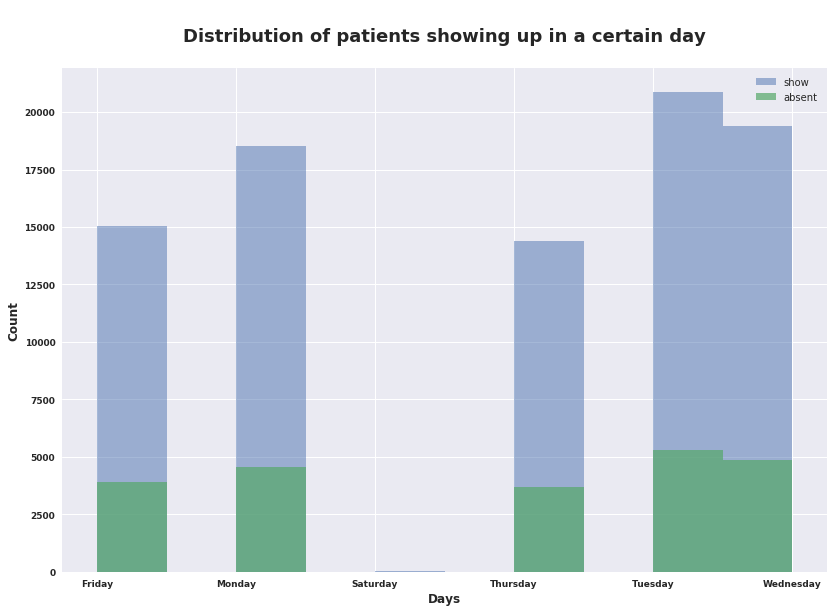

In [27]:
plt.hist(show['Day_of_week'], label='show', alpha=.5)
plt.hist(absent['Day_of_week'], label='absent', alpha=.7)
plt.title('\nDistribution of patients showing up in a certain day\n', fontsize=18, fontweight='bold')
plt.xlabel('Days' , fontweight='bold' , fontsize=12 );
plt.ylabel('Count' , fontweight='bold' , fontsize=12 );
plt.xticks(fontsize=9 ,fontweight='bold');
plt.yticks(fontsize=9 ,fontweight='bold');
plt.legend()
plt.show()

#### As it shown, patients don't show up at both Saturday and Sunday, but they attend more at Friday and Monday. The most active days are Tuesday and Wednesday. although these are working day.

### Question 3 : Are No-show appointments associated with a certain Age? 

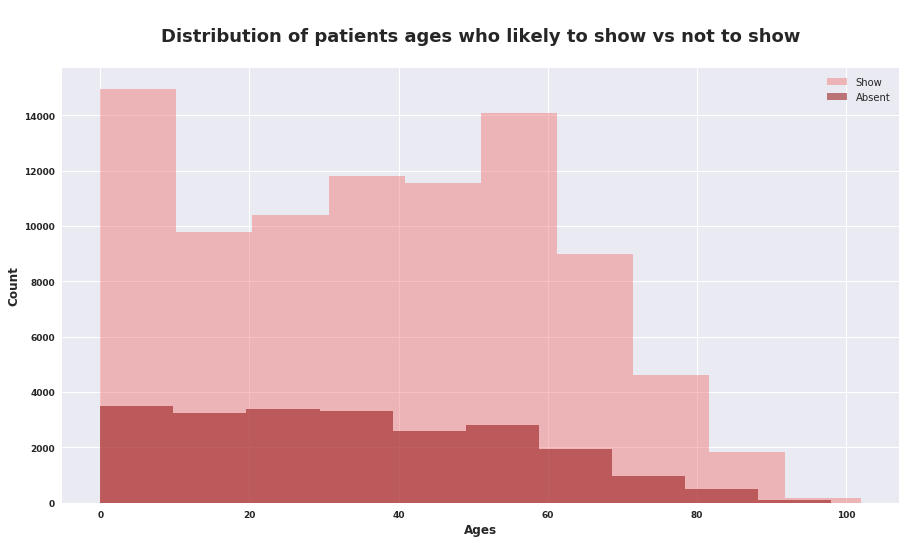

In [28]:
plt.figure(figsize=(15,8))
plt.hist(show['Age'], label='Show', alpha=0.5, color='lightcoral')
plt.hist(absent['Age'], label='Absent', alpha=0.5, color='darkred')
plt.title('\nDistribution of patients ages who likely to show vs not to show\n', fontsize=18, fontweight='bold')
plt.xlabel('Ages', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.legend()
plt.show()

#### According to the graph, ages Less than 10 and between 55 and 60 are the most shown up and from 90 to 100 they don't show up at all.

### Question 4 : Do patients with a scholarship show up more than patients without one ?

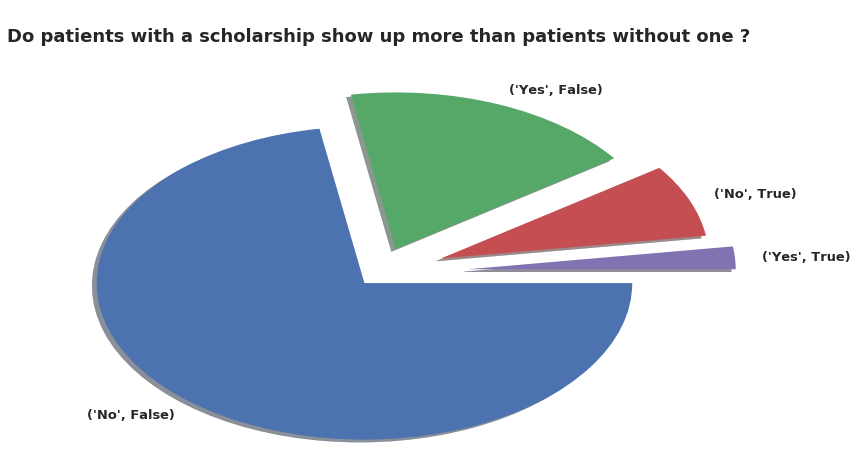

In [29]:
scholarship_effect = cleaned_df.groupby('No_show')['Scholarship'].value_counts().nlargest(10)
plt.subplots(figsize=(10,6))
plt.title('\nDo patients with a scholarship show up more than patients without one ?\n\n\n',fontsize=18,fontweight='bold');
plt.pie(scholarship_effect ,labels=scholarship_effect.index , radius=1.2,counterclock=False , textprops={'fontsize': 13 , 'fontweight' : 'bold'}, shadow=True, explode=(0.1, 0.2, 0.3, 0.4));
plt.xticks(fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');

#### According to the distribution, it doesn't matter if people own a scholarship or no, because the higher number of people who are committed, are not enrolled in this scholarship.

### Question 5 : Which Neighbourhood has the biggest number of appointments?

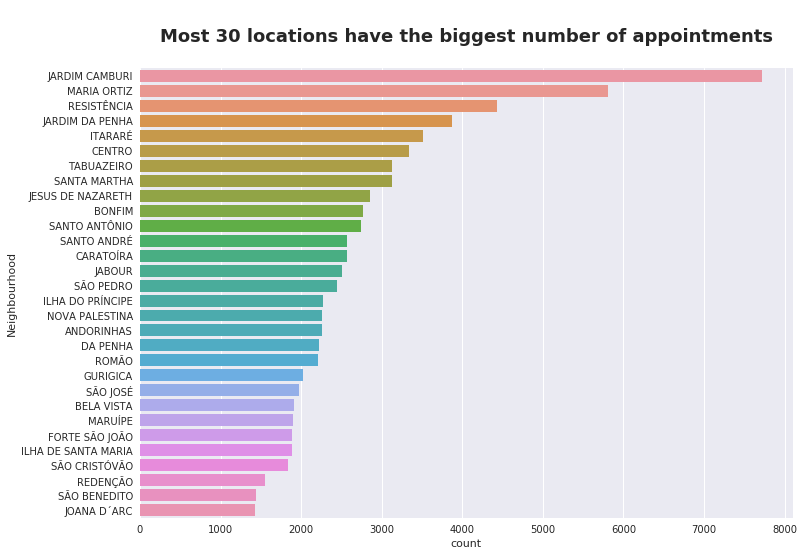

In [30]:
top_30 = cleaned_df['Neighbourhood'].value_counts()[:30].index
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('\nMost 30 locations have the biggest number of appointments\n',fontsize=18,fontweight='bold');
sns.countplot(data=cleaned_df, y='Neighbourhood', order=top_30);

In [31]:
top_30.values

array(['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA',
       'ITARARÉ', 'CENTRO', 'TABUAZEIRO', 'SANTA MARTHA',
       'JESUS DE NAZARETH', 'BONFIM', 'SANTO ANTÔNIO', 'SANTO ANDRÉ',
       'CARATOÍRA', 'JABOUR', 'SÃO PEDRO', 'ILHA DO PRÍNCIPE',
       'NOVA PALESTINA', 'ANDORINHAS', 'DA PENHA', 'ROMÃO', 'GURIGICA',
       'SÃO JOSÉ', 'BELA VISTA', 'MARUÍPE', 'FORTE SÃO JOÃO',
       'ILHA DE SANTA MARIA', 'SÃO CRISTÓVÃO', 'REDENÇÃO', 'SÃO BENEDITO',
       'JOANA D´ARC'], dtype=object)

### Question 6 : Do patients with Hypertension show up more ?

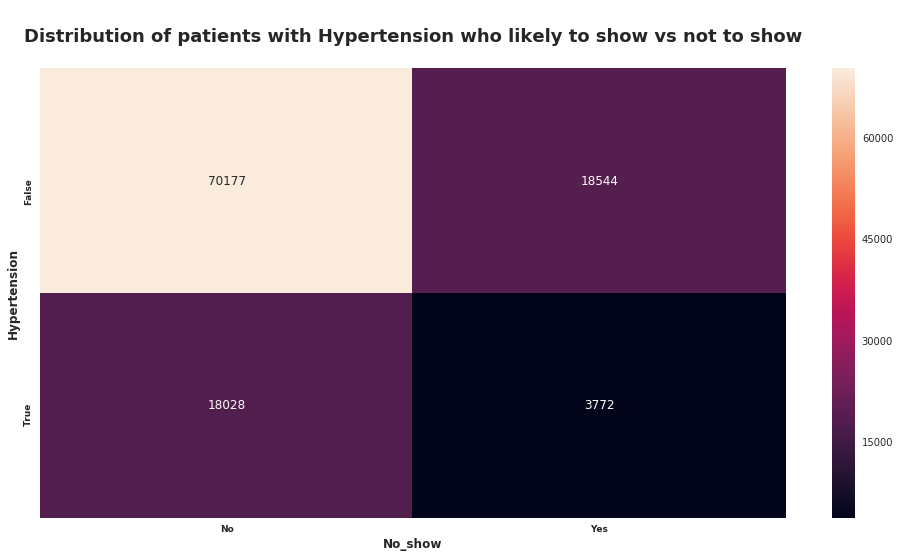

In [32]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
hypertension = cleaned_df.groupby(['No_show', 'Hypertension']).size()
hypertension = hypertension.reset_index(name = 'count')
hypertension = hypertension.pivot(index = 'Hypertension', columns = 'No_show', values = 'count')
plt.title('\nDistribution of patients with Hypertension who likely to show vs not to show\n',fontsize=18,fontweight='bold');
plt.xlabel('Absence', fontsize=12, fontweight='bold')
plt.ylabel('Hypertension', fontsize=12, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
sns.heatmap(hypertension, annot = True, fmt = '.0f');

### Question 7 : Do patients with Diabetes show up more ?

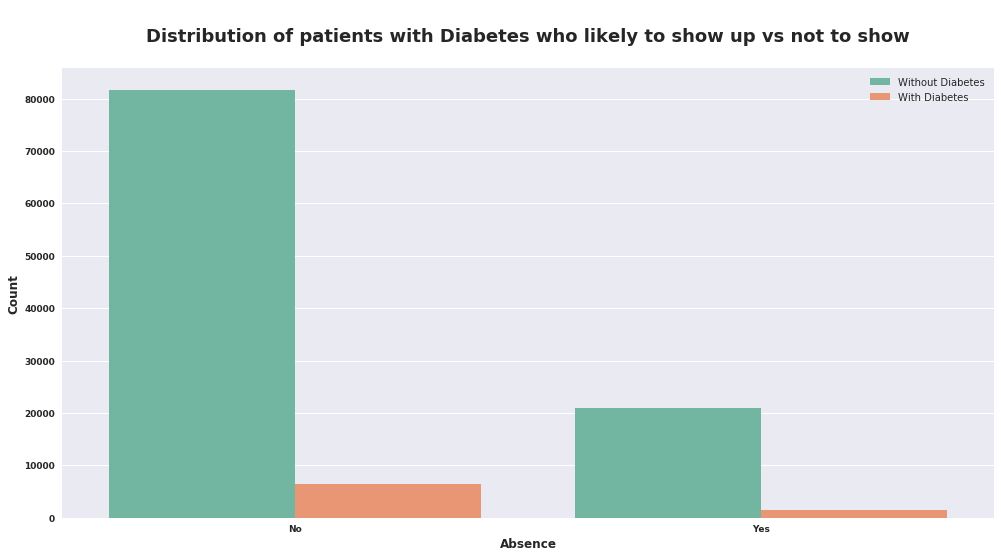

In [33]:
sns.countplot(data = cleaned_df, x = 'No_show', hue = 'Diabetes', palette="Set2");
sns.set(rc={'figure.figsize':(13.7,9.27)})
plt.title('\nDistribution of patients with Diabetes who likely to show up vs not to show\n', fontsize=18, fontweight='bold');
plt.xlabel('Absence' , fontweight='bold' , fontsize=12 );
plt.ylabel('Count' , fontweight='bold' , fontsize=12 );
plt.xticks(fontsize=9 ,fontweight='bold');
plt.yticks(fontsize=9 ,fontweight='bold');
plt.legend(['Without Diabetes', 'With Diabetes']);

#### According to the distributions, patients who have Hypertension and Diabetes are less than patients without them and both are more likely to attend their appointments.

### Question 8 : Does alcoholism effect patients showing up who have it ?

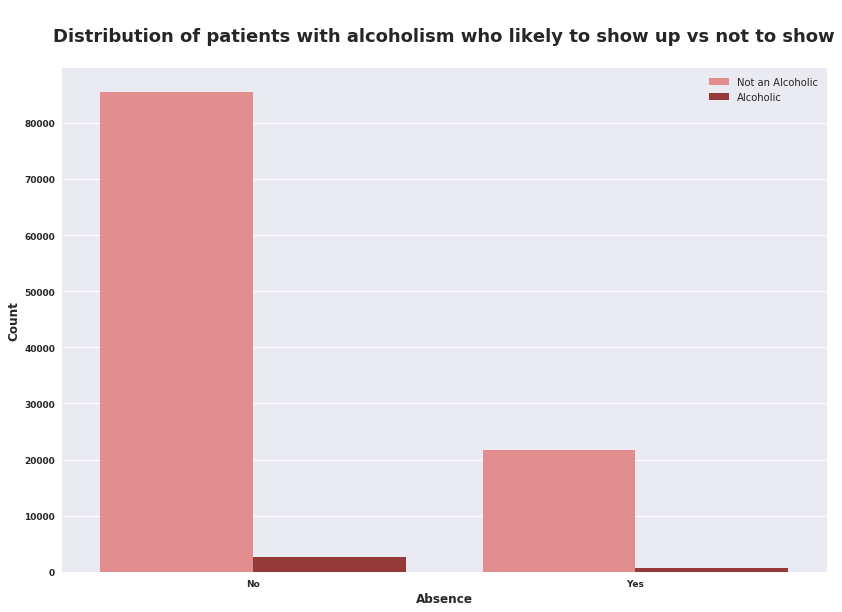

In [34]:
sns.countplot(data=cleaned_df, x = 'No_show', hue = 'Alcoholism', palette=['lightcoral', 'brown']);
plt.title('\nDistribution of patients with alcoholism who likely to show up vs not to show\n', fontsize=18, fontweight='bold')
plt.xlabel('Absence' , fontweight='bold' , fontsize=12 );
plt.ylabel('Count' , fontweight='bold' , fontsize=12 );
plt.xticks(fontsize=9 ,fontweight='bold');
plt.yticks(fontsize=9 ,fontweight='bold');
plt.legend(['Not an Alcoholic','Alcoholic']);

#### Most people who attend their appointments don't have alcoholism, even the patients who have alcoholism are more committed to attend than missing their appointments and that's great. 

### Question 9 : Does Handicap prevent patients from attend their appointments ?

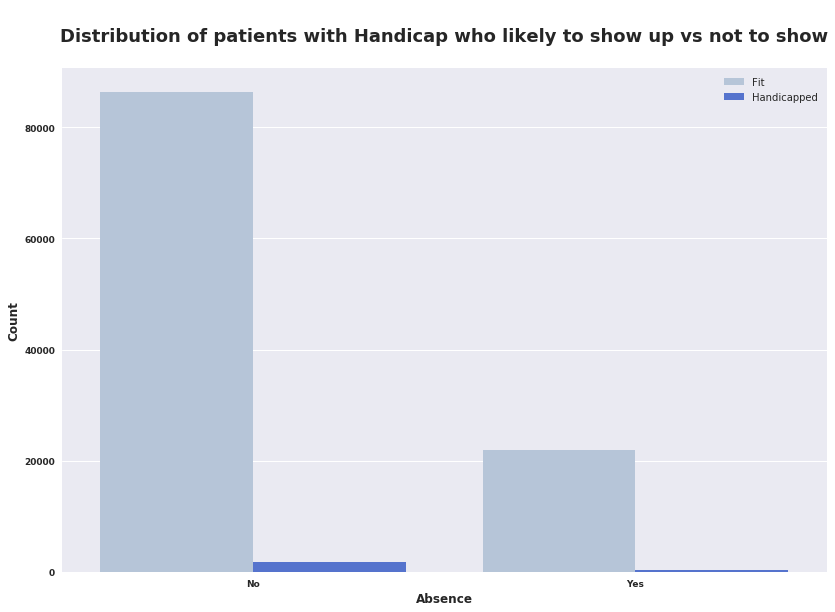

In [35]:
sns.countplot(data=cleaned_df, x= 'No_show', hue='Handicap', palette=['lightsteelblue', 'royalblue']);
plt.title('\nDistribution of patients with Handicap who likely to show up vs not to show\n', fontsize=18, fontweight='bold')
plt.xlabel('Absence' , fontweight='bold' , fontsize=12 );
plt.ylabel('Count' , fontweight='bold' , fontsize=12 );
plt.xticks(fontsize=9 ,fontweight='bold');
plt.yticks(fontsize=9 ,fontweight='bold');
plt.legend(['Fit', 'Handicapped']);

### Question 10 : Does sending SMS to patients to remind them of their appoinments decrease the number of absence ?

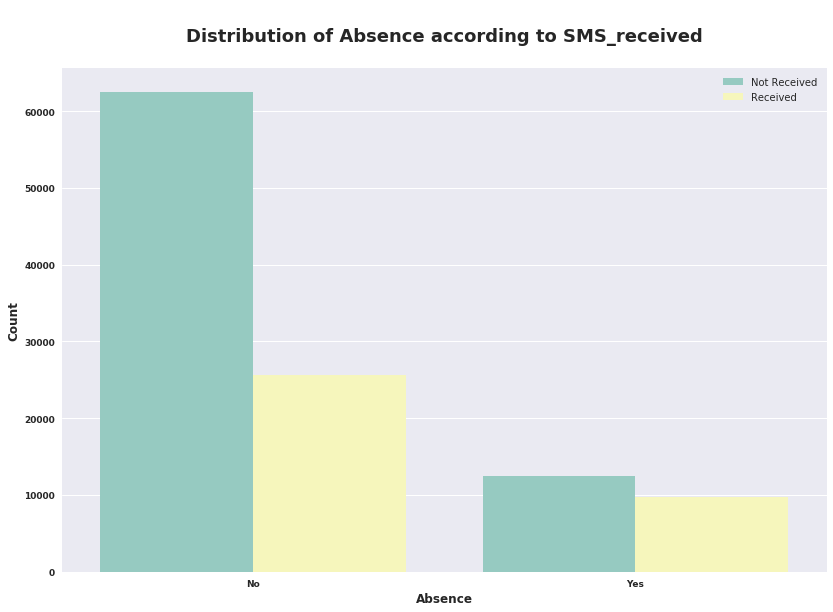

In [36]:
sns.countplot(data=cleaned_df, x= 'No_show', hue='SMS_received', palette="Set3");
plt.title('\nDistribution of Absence according to SMS_received\n', fontsize=18, fontweight='bold')
plt.xlabel('Absence' , fontweight='bold' , fontsize=12 );
plt.ylabel('Count' , fontweight='bold' , fontsize=12 );
plt.xticks(fontsize=9 ,fontweight='bold');
plt.yticks(fontsize=9 ,fontweight='bold');
plt.legend(['Not an Alcoholic','Alcoholic']);
plt.legend(['Not Received', 'Received']);

#### Sending SMS as a reminder doesn't affect on people absence by decreasing it , as the higher number of people who attended their appointments didn't receive SMS.

<a id='conclusions'></a>
## Conclusions

### Finally, here is some important observations:
>__1. Number of Females patients is greater than males patients according to the dataset so we can say that both Genders are committed, females are bit more committed as their count higher than males.__

>__2. Tuesday is the most day that has number of appointments and attending as well, followed by Wednesday, Monday, Friday, Thursday in the order. Saturday has the least, and that makes sense as Saturday is a weekend and Tuesday, Wednesday, Monday are working days.__

>__3. Ages under 10 and between 55 and 60 have the higher number of appointments and showing up, and we can't assume a specific range of age that is likely to be absent more. We found out that people who are 80 and more don't show up alot, or don't show up at all compared to other ages.__

>__4. Enrolling in Bolsa Familia's Scholarship doesn't decrease the number of absence, according to the distribusion, people who are enrolled in the scholarship don't show up more than people who don't have it, so having no scholarship doesn't affect the commitement__

>__5. Top 5 Neighbourhood that have the higher number of appointments are :__
- JARDIM CAMBURI
- MARIA ORTIZ
- RESISTÊNCIA
- JARDIM DA PENHA
- ITARARÉ 

>__6. Patients who have Hypertension and Diabetes are more likely to show up than missing thier appointments and patients who don't have chronic diseases care about their health too.__

>__7. Number of patients who have alcoholism is too small, even the alcoholic patients care about attending their appointments more than missing them.__

>__8. It was an interesting exploration that people who get a SMS reminder before their appointments are more likely to show up more than people who didn't received one, so SMS reminders does not affect on showing up or absence.__

## Limitations 

> __The dataset have alot of categorical data and they are more than quantitative ones so we just explore a relationship between 2 variables, more statistical tests are required and additional information will be more helpful.__

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0